**RESIDUAL ANALYSIS**


In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
X=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [2]:
residuals=y_test-y_pred
print("\nFirst 5 residuals")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 residuals
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


In [3]:
residuals=y_test-y_pred
print("\nFirst 5 Residuals")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residuals':residuals[:5]}))



First 5 Residuals
        Actual  Predicted  Residuals
20046  0.47700   0.719123  -0.242123
3024   0.45800   1.764017  -1.306017
15663  5.00001   2.709659   2.290351
20484  2.18600   2.838926  -0.652926
9814   2.78000   2.604657   0.175343


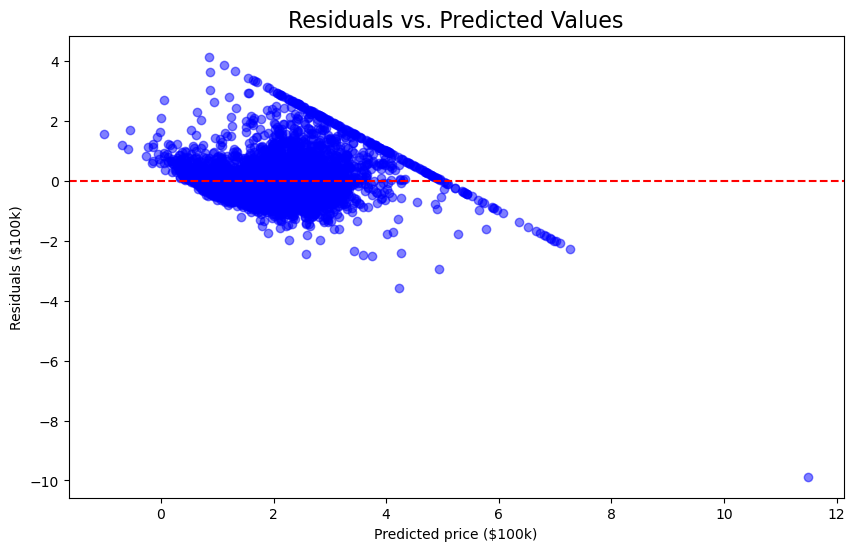

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='blue',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residuals vs. Predicted Values',fontsize=16)
plt.xlabel('Predicted price ($100k)')
plt.ylabel('Residuals ($100k)')
plt.show()

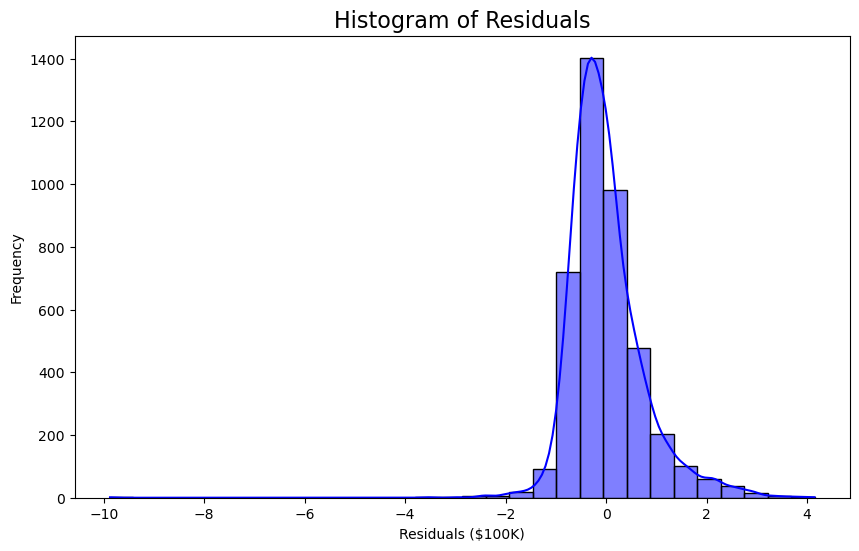

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histogram of Residuals',fontsize=16)
plt.xlabel('Residuals ($100K)')
plt.ylabel('Frequency')
plt.show()

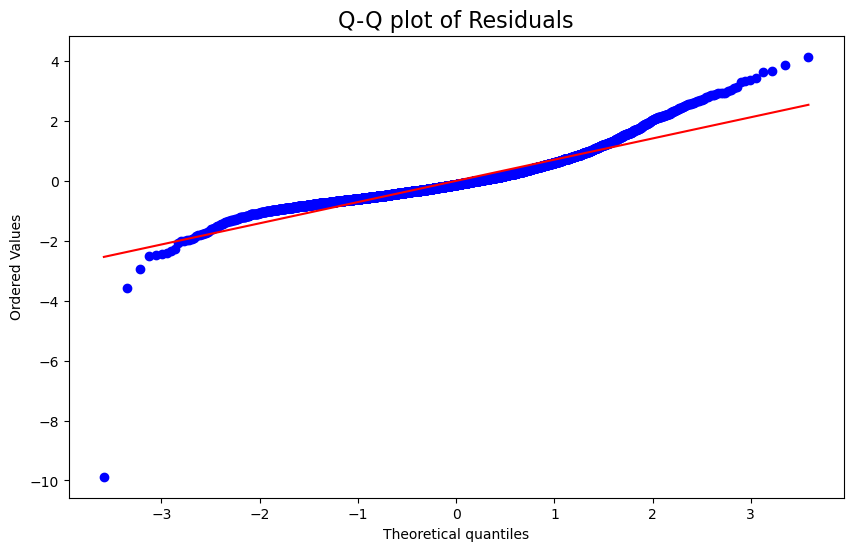

In [7]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('Q-Q plot of Residuals',fontsize=16)
plt.show()